In [482]:
import pandas as pd
import numpy as np
import ujson as json
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
import tensorflow as tf

In [578]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
NUM_FILES = 2000
N_EPOCHS = 40
RANDOM_SEED = 42

In [538]:
data_files = os.listdir('./data/')
data_files = [f'./data/{file}' for file in data_files]

In [539]:
all_drawings = []
all_categories = []
N_CATEGORIES = 0

# categories = []
for idx, file in enumerate(data_files):
    if file == './data/.DS_Store':
        continue
    N_CATEGORIES += 1
#     category = file.split('/')[-1].split('.')[0]
#     categories.append(category)
    data = np.load(file)[:NUM_FILES]
    for d in data:
        reshaped_img = np.array(np.reshape(d, (-1, 28))).astype(np.float32)
        
        all_drawings.append(reshaped_img)
        all_categories.append(idx)

# df = pd.DataFrame(data=records)

# df.category = pd.Categorical(df.category)

all_drawings = np.array(all_drawings)

all_categories = np.array(all_categories)

In [540]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(all_drawings, all_categories, test_size=0.2, random_state=RANDOM_SEED)

In [541]:
slice_index = int(len(X_train_full)*0.7)

X_train = X_train_full[:slice_index][..., np.newaxis]
X_valid = X_train_full[slice_index:][..., np.newaxis]

y_train = y_train_full[:slice_index][..., np.newaxis]
y_valid = y_train_full[slice_index:][..., np.newaxis]

X_test = X_test[..., np.newaxis]

In [595]:
model = keras.models.Sequential([
    Conv2D(filters=8, kernel_size=8,padding="same", activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,1)),
    MaxPool2D(pool_size=2),

    Conv2D(filters=16, kernel_size=8, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),

#     Conv2D(filters=16, kernel_size=4, padding="same", activation="relu"),
#     MaxPool2D(pool_size=2),
    Dropout(0.3, seed=RANDOM_SEED),

    Flatten(),
    Dense(units=256,activation="relu"),
    Dense(units=N_CATEGORIES+1, activation="softmax"),
])

In [596]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [597]:
history = model.fit(X_train,y_train,epochs = N_EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/40
210/210 [==============================] - 7s 29ms/step - loss: 2.3128 - accuracy: 0.6167 - val_loss: 0.7305 - val_accuracy: 0.7788
Epoch 2/40
210/210 [==============================] - 6s 27ms/step - loss: 0.7229 - accuracy: 0.7701 - val_loss: 0.5701 - val_accuracy: 0.8326
Epoch 3/40
210/210 [==============================] - 6s 28ms/step - loss: 0.5903 - accuracy: 0.8060 - val_loss: 0.4663 - val_accuracy: 0.8517
Epoch 4/40
210/210 [==============================] - 6s 27ms/step - loss: 0.4972 - accuracy: 0.8409 - val_loss: 0.4826 - val_accuracy: 0.8472
Epoch 5/40
210/210 [==============================] - 6s 31ms/step - loss: 0.4337 - accuracy: 0.8612 - val_loss: 0.4055 - val_accuracy: 0.8792
Epoch 6/40
210/210 [==============================] - 6s 30ms/step - loss: 0.3818 - accuracy: 0.8747 - val_loss: 0.4112 - val_accuracy: 0.8778
Epoch 7/40
210/210 [==============================] - 6s 29ms/step - loss: 0.3524 - accuracy: 0.8905 - val_loss: 0.4067 - val_accuracy: 0.8802

In [598]:
score = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

75/75 [==============================] - 1s 6ms/step - loss: 1.0864 - accuracy: 0.8917


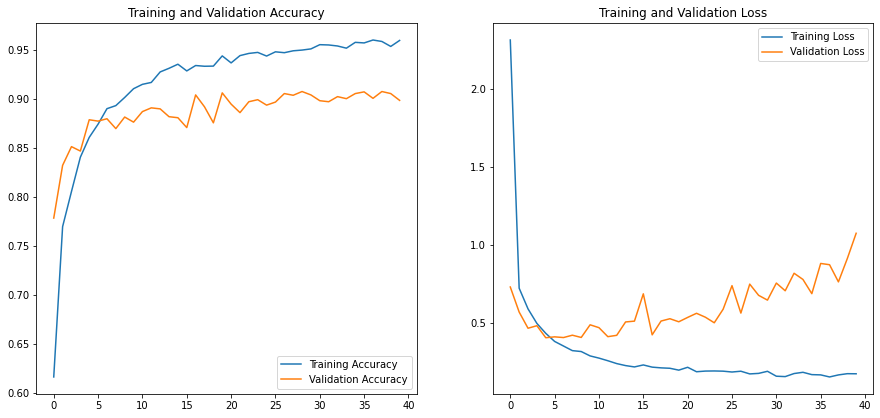

In [599]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(N_EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()